# EDA del archivo Accesos a Internet fijo por banda ancha y angosta por provincia

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
#importo 
ruta_al_archivo = '../DATA/04-BA_provincia.csv'
df = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [3]:
#observo resultado
df.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


**Dial-up** se refiere a un método de conexión a Internet que utiliza la red telefónica conmutada (RTC) para establecer una conexión temporal a través de un módem. Sin embargo, debido a su velocidad de transferencia de datos relativamente lenta en comparación con las tecnologías modernas, como DSL, cable módem y fibra óptica, el acceso a Internet por dial-up ha sido ampliamente reemplazado por estas tecnologías más rápidas y eficientes. 

**banda ancha fija** se refiere a un tipo de conexión a Internet de alta velocidad que utiliza cables físicos para transmitir datos. La "banda ancha" se refiere a la capacidad de transmitir grandes cantidades de datos a velocidades relativamente altas. La conexión "fija" implica que la conexión se establece a través de cables físicos.

Es lo mismo que el anterior pero se suma la provincia


In [4]:
#Se ve la composicion
df.info()#no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [5]:
#En este caso banda ancha y total son iguales?
df['Diferentes'] = df['Total'] != df['Banda ancha fija']
filas_diferentes = df.loc[df['Diferentes']]

if df['Total'].equals(df['Banda ancha fija']):
    df = df.drop('Total', axis=1)
    print("La columna 'Total' y 'Banda ancha fija' son iguales. Se borra total")
else:
    print("La columna 'Total' y 'Banda ancha fija' son diferentes.")
    print("Filas donde son diferentes:")
    print(filas_diferentes)

La columna 'Total' y 'Banda ancha fija' son diferentes.
Filas donde son diferentes:
      Año  Trimestre         Provincia  Banda ancha fija  Dial up  Total  \
4    2022          4            Chubut               168    904.0    169   
12   2022          4           Mendoza               291    777.0    292   
28   2022          3            Chubut               165    904.0    166   
36   2022          3           Mendoza               289    777.0    290   
39   2022          3         Río Negro               160    548.0    161   
..    ...        ...               ...               ...      ...    ...   
855  2014          1         Río Negro                94      1.0     95   
858  2014          1          San Luis                12    364.0     13   
859  2014          1        Santa Cruz                26    460.0     27   
860  2014          1          Santa Fe               506    612.0    507   
862  2014          1  Tierra Del Fuego                27    766.0     28   

   

Se elimina la columna total debido a la insignificancia de las diferencias. En las filas que no son iguales es por 1 nomas, lo que no hace la diferencia en el analisis

In [6]:
df = df.drop('Total', axis=1)
df = df.drop('Diferentes', axis=1)

In [7]:
df_sin_duplicados = df.drop_duplicates()

In [8]:
df_sin_duplicados.info() #igual cantidad, no habia duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 33.9+ KB


Creo grafico para observar la evolucion de la banda ancha en cada provincia

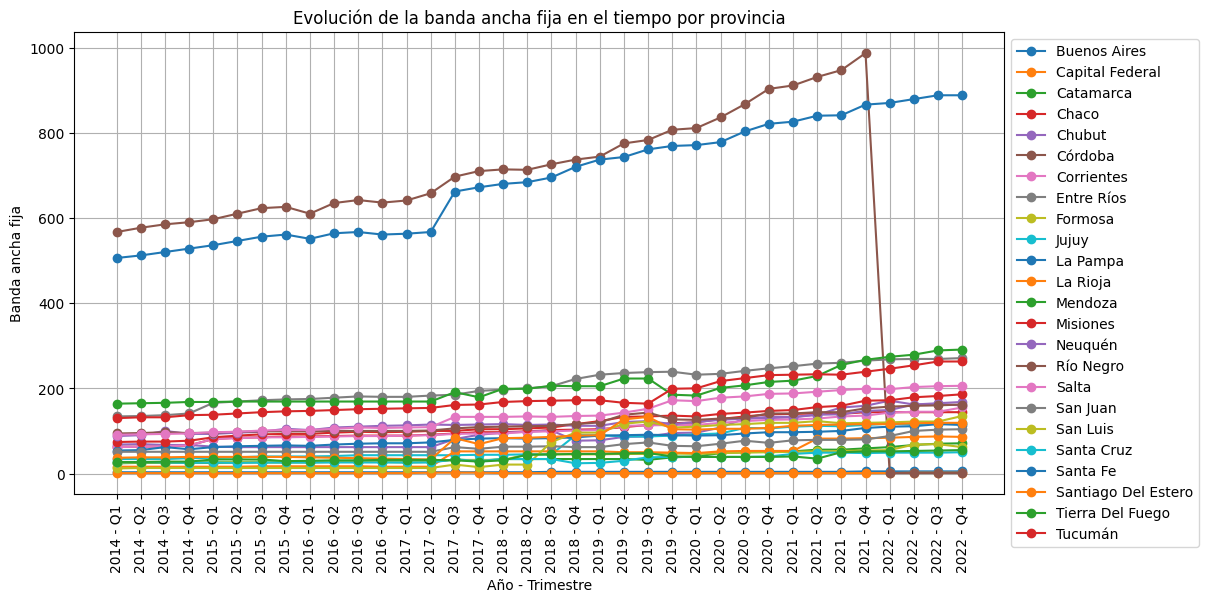

In [9]:
df_sorted = df.sort_values(['Año', 'Trimestre'])

# Crear el gráfico de evolución de la banda ancha fija para cada provincia con años ordenados
provincias = df['Provincia'].unique()

plt.figure(figsize=(12,6))

for provincia in provincias:
    datos_provincia = df_sorted[df_sorted['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'].astype(str) + ' - Q' + datos_provincia['Trimestre'].astype(str), datos_provincia['Banda ancha fija'], marker='o', label=provincia)

plt.title('Evolución de la banda ancha fija en el tiempo por provincia')
plt.xlabel('Año - Trimestre')
plt.ylabel('Banda ancha fija')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.xticks(rotation=90)  # Cambia el ángulo de rotación a 90 grados para las etiquetas del eje x
plt.show()

Se observa un dato extraño en la provincia que mas banda ancha tenia hasta 2022, bajando a 0, lo cual puede ser por datos faltantes. Tambien en CABA se observa pocos accesos lo cual es raro y se analizara posteriormente.

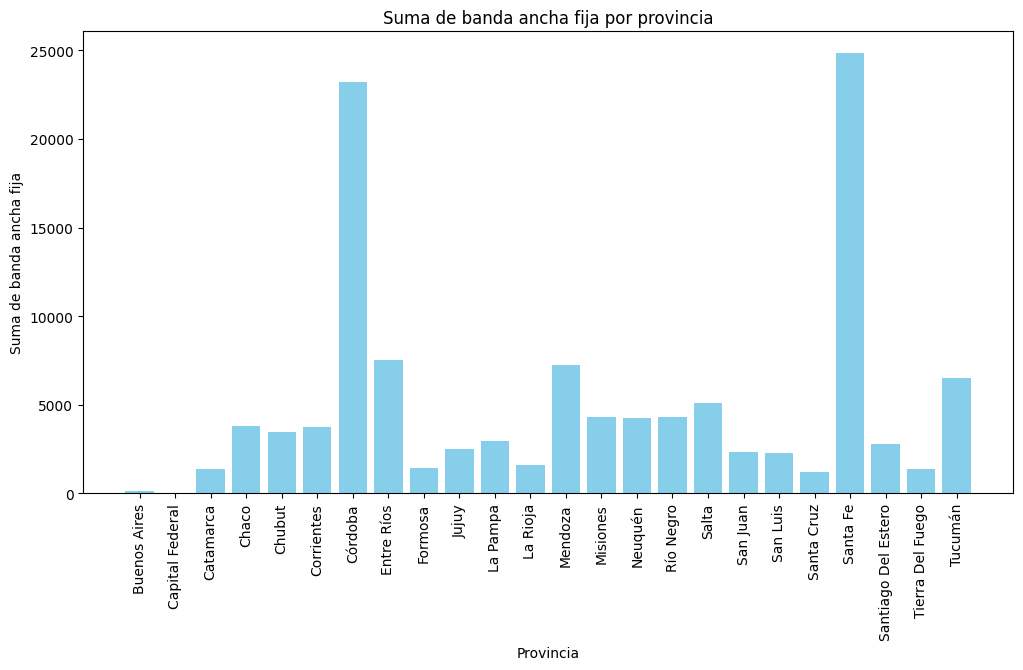

In [10]:
# Calcular la suma de la banda ancha por provincia
suma_banda_ancha_por_provincia = df.groupby('Provincia')['Banda ancha fija'].sum().reset_index()

# Crear el gráfico de barras de la suma de banda ancha por provincia
plt.figure(figsize=(12,6))
plt.bar(suma_banda_ancha_por_provincia['Provincia'], suma_banda_ancha_por_provincia['Banda ancha fija'], color='skyblue')
plt.title('Suma de banda ancha fija por provincia')
plt.xlabel('Provincia')
plt.ylabel('Suma de banda ancha fija')
plt.xticks(rotation=90)
plt.show()

Otro dato que llama la atencion es el bajo numero que tiene buenos aires..

In [11]:
cordoba_data = df[df['Provincia'] == 'Córdoba']
cordoba_data.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up
5,2022,4,Córdoba,1,68.0
29,2022,3,Córdoba,1,68.0
53,2022,2,Córdoba,1,68.0
77,2022,1,Córdoba,1,74.0
101,2021,4,Córdoba,987,77.0


No habia datos faltantes, sino que cuando llega a mil, baja a 1. Seria 1000 por lo que se multiplica *1000

In [12]:
condicion = (df['Provincia'] == 'Córdoba') & (df['Banda ancha fija'] == 1)
df.loc[condicion, 'Banda ancha fija'] *= 1000


Se observa lo mismo en 'Capital Federal'

In [13]:
cordoba_data = df[df['Provincia'] == 'Capital Federal']
cordoba_data.head(10)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up
1,2022,4,Capital Federal,2,2.0
25,2022,3,Capital Federal,2,2.0
49,2022,2,Capital Federal,2,2.0
73,2022,1,Capital Federal,1,2.0
97,2021,4,Capital Federal,1,2.0
121,2021,3,Capital Federal,1,2.0
145,2021,2,Capital Federal,1,2.0
169,2021,1,Capital Federal,1,1.0
193,2020,4,Capital Federal,1,1.0
217,2020,3,Capital Federal,1,1.0


In [14]:
condicion = (df['Provincia'] == 'Capital Federal') & (df['Banda ancha fija'] < 3)
df.loc[condicion, 'Banda ancha fija'] *= 1000

Se observa lo mismo en 'Buenos aires'

In [15]:
cordoba_data = df[df['Provincia'] == 'Buenos Aires']
cordoba_data.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up
0,2022,4,Buenos Aires,5,6.0
24,2022,3,Buenos Aires,5,6.0
48,2022,2,Buenos Aires,5,6.0
72,2022,1,Buenos Aires,5,6.0
96,2021,4,Buenos Aires,5,6.0


In [16]:
condicion = (df['Provincia'] == 'Buenos Aires') & (df['Banda ancha fija'] < 6)
df.loc[condicion, 'Banda ancha fija'] *= 1000

Volvemos a graficar..

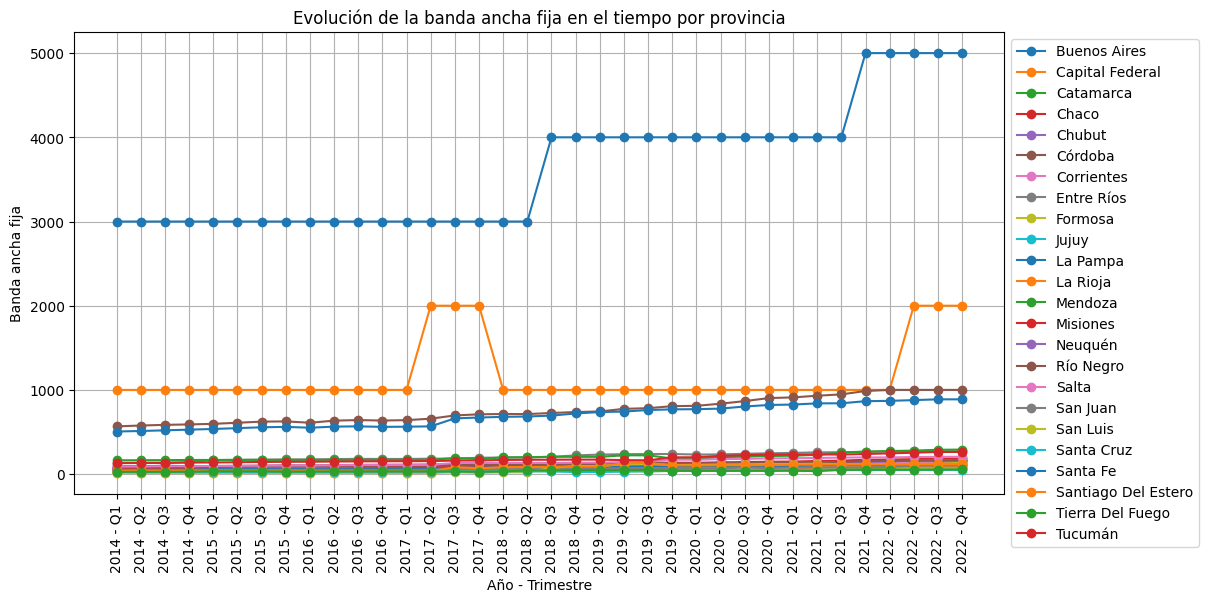

In [17]:
df_sorted = df.sort_values(['Año', 'Trimestre'])

# Crear el gráfico de evolución de la banda ancha fija para cada provincia con años ordenados
provincias = df['Provincia'].unique()

plt.figure(figsize=(12,6))

for provincia in provincias:
    datos_provincia = df_sorted[df_sorted['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'].astype(str) + ' - Q' + datos_provincia['Trimestre'].astype(str), datos_provincia['Banda ancha fija'], marker='o', label=provincia)

plt.title('Evolución de la banda ancha fija en el tiempo por provincia')
plt.xlabel('Año - Trimestre')
plt.ylabel('Banda ancha fija')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.xticks(rotation=90)  # Cambia el ángulo de rotación a 90 grados para las etiquetas del eje x
plt.show()

El salto hacia abajo en CABA se puede asociar a la crisis que empezo a vivir argentina en 2018, debiendo pasar varios años para recuperar el acceso

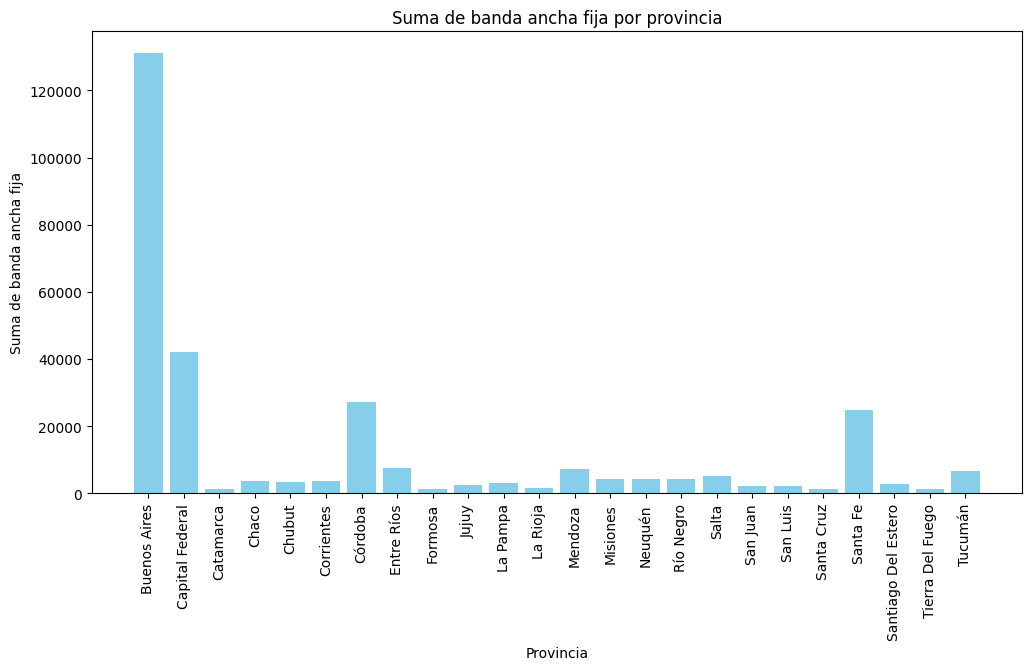

In [18]:
# Calcular la suma de la banda ancha por provincia
suma_banda_ancha_por_provincia = df.groupby('Provincia')['Banda ancha fija'].sum().reset_index()

# Crear el gráfico de barras de la suma de banda ancha por provincia
plt.figure(figsize=(12,6))
plt.bar(suma_banda_ancha_por_provincia['Provincia'], suma_banda_ancha_por_provincia['Banda ancha fija'], color='skyblue')
plt.title('Suma de banda ancha fija por provincia')
plt.xlabel('Provincia')
plt.ylabel('Suma de banda ancha fija')
plt.xticks(rotation=90)
plt.show()

## Ahora hacemos lo mismo para dial up


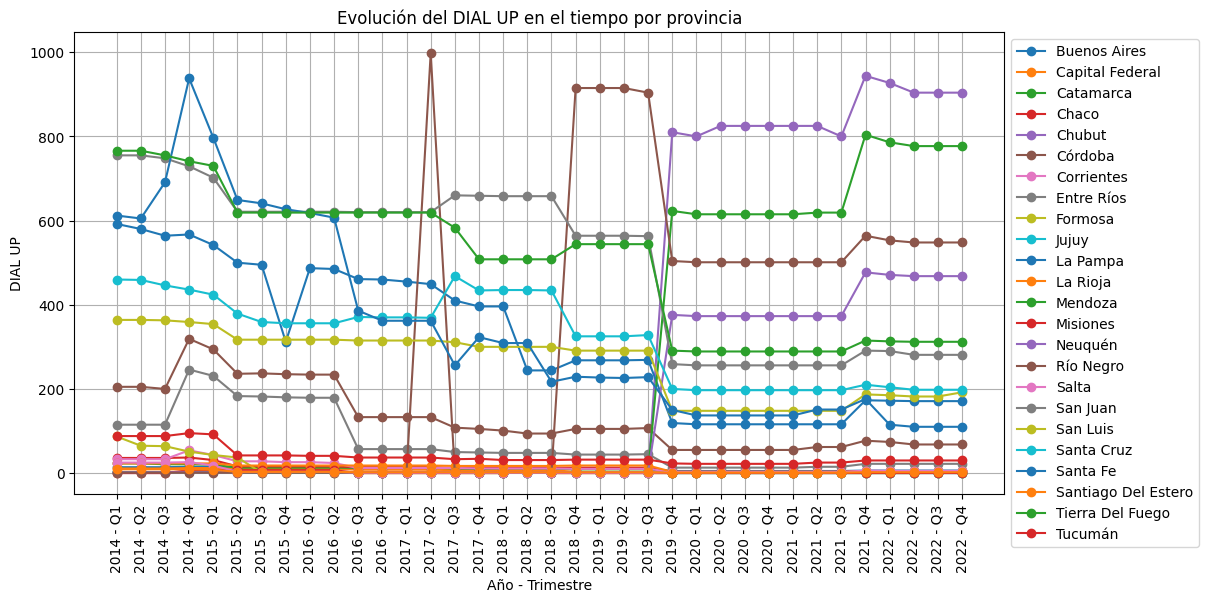

In [19]:
df_sorted = df.sort_values(['Año', 'Trimestre'])

# Crear el gráfico de evolución del dial up para cada provincia con años ordenados
provincias = df['Provincia'].unique()

plt.figure(figsize=(12,6))

for provincia in provincias:
    datos_provincia = df_sorted[df_sorted['Provincia'] == provincia]
    plt.plot(datos_provincia['Año'].astype(str) + ' - Q' + datos_provincia['Trimestre'].astype(str), datos_provincia['Dial up'], marker='o', label=provincia)

plt.title('Evolución del DIAL UP en el tiempo por provincia')
plt.xlabel('Año - Trimestre')
plt.ylabel('DIAL UP')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.xticks(rotation=90)  # Cambia el ángulo de rotación a 90 grados para las etiquetas del eje x
plt.show()

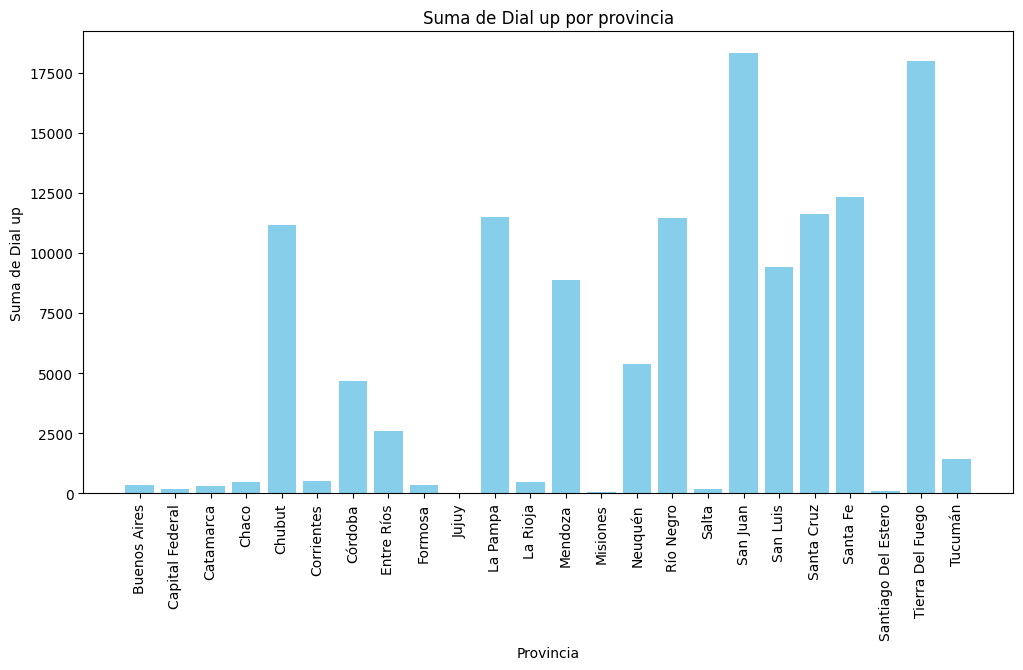

In [20]:
# Calcular la suma de la banda ancha por provincia
suma_banda_ancha_por_provincia = df.groupby('Provincia')['Dial up'].sum().reset_index()

# Crear el gráfico de barras de la suma de banda ancha por provincia
plt.figure(figsize=(12,6))
plt.bar(suma_banda_ancha_por_provincia['Provincia'], suma_banda_ancha_por_provincia['Dial up'], color='skyblue')
plt.title('Suma de Dial up por provincia')
plt.xlabel('Provincia')
plt.ylabel('Suma de Dial up')
plt.xticks(rotation=90)
plt.show()

Se observan los mismos errores con los datos en miles, pero por no ser relevantes para el analisis, no procedo a analizar al detalle estos datos, si el dataframe del resumen a continuacion. No es relevante debido a que poco a poco se dejan de utilizar los telefonos fijos y por lo tanto este tipo de acceso a internet

## Se observa el archivo resumen de Accesos a Internet fijo por banda ancha y angosta

In [21]:
#importo 
ruta_al_archivo = '../DATA/03-Internet Nacional.csv'
df2 = pd.read_csv(ruta_al_archivo, encoding='utf-8')

In [22]:
#observo resultado
df2.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021


In [23]:
#Se ve la composicion
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [24]:
#Son iguales?
son_iguales = df2['Total'].equals(df2['Banda ancha fija'])

if son_iguales:
    df2 = df2.drop('Total', axis=1)
    print("La columna 'Total' y 'Banda ancha fija' son iguales. Se borra total")
else:
    print("La columna 'Total' y 'Banda ancha fija' son diferentes.")

La columna 'Total' y 'Banda ancha fija' son iguales. Se borra total


Se ven datos unicos de año y dial up

In [25]:
unique_dial_up = df2['Dial up'].unique()
print(unique_dial_up)

[12 13 10 22 27 28 29 32 33 38 39 36]


In [26]:
unique_dial_up = df2['Año'].unique()
print(unique_dial_up)

[2022 2021 2020 2019 2018 2017 2016 2015 2014]


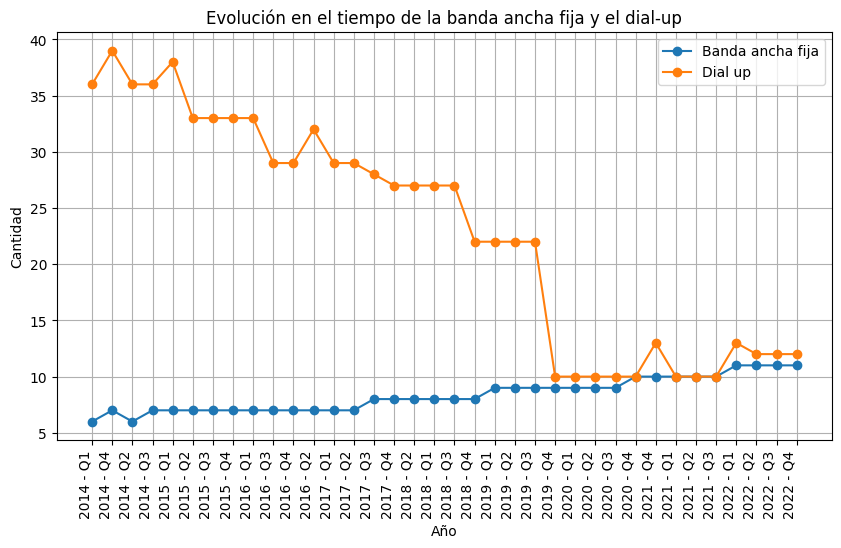

In [27]:
df_sorted = df2.sort_values('Año')

# Crear el gráfico de evolución en el tiempo de la banda ancha fija y el dial-up con años ordenados
plt.figure(figsize=(10,6))
plt.plot(df_sorted['Año'].astype(str) + ' - Q' + df_sorted['Trimestre'].astype(str), df_sorted['Banda ancha fija'], marker='o', label='Banda ancha fija')
plt.plot(df_sorted['Año'].astype(str) + ' - Q' + df_sorted['Trimestre'].astype(str), df_sorted['Dial up'], marker='o', label='Dial up')
plt.title('Evolución en el tiempo de la banda ancha fija y el dial-up')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend()
plt.grid()
# Ajustar el espaciado de las etiquetas en el eje x
plt.xticks(rotation=45, ha="right")
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=90)  # Cambia el ángulo de rotación a 90 grados para las etiquetas del eje x
plt.show()

Se observa lo mencionado aneriormente, como la banda ancha fija le va ganando terreno al dial up, que tiene una clara tendencia bajista

## Exporto csv para usar en power bi

In [28]:
import os

ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Analitics\DATA PowerBi'
nombre_archivo = 'Accesos a internet por banda ancha y angosta.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

df.to_csv(ruta_completa, index=False)

In [29]:
ruta_carpeta = r'C:\Users\nicoi\Desktop\HENRY\Henry data\Analitics\DATA PowerBi'
nombre_archivo = 'Accesos a internet por banda ancha y angosta_resumen.csv'
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

df2.to_csv(ruta_completa, index=False)